In [11]:
# import 해줄 것들
import pandas as pd
from bs4 import BeautifulSoup
import re
import time
from selenium import webdriver
import sys
from tqdm.notebook import tqdm
from selenium.webdriver.common.keys import Keys

In [15]:
df = pd.read_csv('c:/py_data/인스타게시글0~200까지.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  200 non-null    int64 
 1   본문          200 non-null    object
 2   해시태그        200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [30]:
hash_lst = []
for i in df['해시태그']:
    hash_tag = i.replace('[','').replace(']','').replace('\'','').split(',')
    hash_lst.append(hash_tag)
    
hash_lst

[['#대구',
  ' #제주도',
  ' #산',
  ' #mountain',
  ' #한라산',
  ' #관음사',
  ' #등산',
  ' #삼각봉',
  ' #백록담',
  ' #해발',
  ' #1950m',
  ' #날씨',
  ' #맑음',
  ' #성판악',
  ' #하산',
  ' #사라오름',
  ' #버킷',
  ' #성공',
  ' #뿌듯',
  ' #운동',
  ' #운동하는남자',
  ' #소통',
  ' #공감',
  ' #일상'],
 [''],
 ['#건강합시다',
  ' #함께걸어요',
  ' #운동',
  ' #후기',
  ' #운동스타그램',
  ' #산스타그램',
  ' #등산',
  ' #걷기',
  ' #취미',
  ' #hiking',
  ' #walking',
  ' #블랙야크100대명산',
  ' #bac',
  ' #혼산',
  ' #혼걷',
  ' #일상',
  ' #소통',
  ' #선사시대',
  ' #원시인',
  ' #이만년',
  ' #진천동'],
 ['#엠팩플러스', ' #이벤트', ' #event', ' #캠핑', ' #등산', ' #여름휴가', ' #피크닉', ' #폴라엔젤클립'],
 ['#주식',
  ' #투자',
  ' #재테크',
  ' #가치투자',
  ' #해외선물',
  ' #비트코인',
  ' #단타',
  ' #해운대',
  ' #압구정',
  ' #스시',
  ' #오마카세',
  ' #호캉스',
  ' #와인',
  ' #등산',
  ' #쇼핑',
  ' #러닝',
  ' #캠핑',
  ' #라이딩',
  ' #요가'],
 ['#연습',
  ' #부산',
  ' #황령산',
  ' #황령산봉수대',
  ' #황령산야경',
  ' #봉수대',
  ' #야경',
  ' #일상',
  ' #daily'],
 ['#조용히다다가모가지를똭',
  ' #k2',
  ' #k2f

In [44]:
from apyori import apriori
results = list(apriori(hash_lst,
             min_support=0.09,    # 지지도
             min_confidence=0.08, # 신뢰도
             min_lift=1.0,       # 향상도
             max_length=2))      # 크기가 2인 규칙
results

[RelationRecord(items=frozenset({''}), support=0.185, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({''}), confidence=0.185, lift=1.0)]),
 RelationRecord(items=frozenset({' #hiking'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' #hiking'}), confidence=0.1, lift=1.0)]),
 RelationRecord(items=frozenset({' #등린이'}), support=0.095, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' #등린이'}), confidence=0.095, lift=1.0)]),
 RelationRecord(items=frozenset({' #등산'}), support=0.615, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' #등산'}), confidence=0.615, lift=1.0)]),
 RelationRecord(items=frozenset({' #등산스타그램'}), support=0.16, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' #등산스타그램'}), confidence=0.16, lift=1.0)]),
 RelationRecord(items=frozenset({' #산'}), support=0.09, ordered_statistics=[OrderedStatisti

In [45]:
import pandas as pd
# 데이터 프레임 형태로 정리합니다.
columns = ['source','target','support']
network_df = pd.DataFrame(columns=columns)
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]   #
        row = [items[0],items[1],result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
network_df

,source,target,support
0,#등산,#등린이,0.09
1,#등산,#등산스타그램,0.14
2,#등산,#산스타그램,0.09
3,#등산,#일상,0.09


In [46]:
# 2차원 리스트를 1차원으로 변경
one_dataset = []
for i in hash_lst:
    one_dataset = one_dataset + i
    
one_dataset

['#대구',
 ' #제주도',
 ' #산',
 ' #mountain',
 ' #한라산',
 ' #관음사',
 ' #등산',
 ' #삼각봉',
 ' #백록담',
 ' #해발',
 ' #1950m',
 ' #날씨',
 ' #맑음',
 ' #성판악',
 ' #하산',
 ' #사라오름',
 ' #버킷',
 ' #성공',
 ' #뿌듯',
 ' #운동',
 ' #운동하는남자',
 ' #소통',
 ' #공감',
 ' #일상',
 '',
 '#건강합시다',
 ' #함께걸어요',
 ' #운동',
 ' #후기',
 ' #운동스타그램',
 ' #산스타그램',
 ' #등산',
 ' #걷기',
 ' #취미',
 ' #hiking',
 ' #walking',
 ' #블랙야크100대명산',
 ' #bac',
 ' #혼산',
 ' #혼걷',
 ' #일상',
 ' #소통',
 ' #선사시대',
 ' #원시인',
 ' #이만년',
 ' #진천동',
 '#엠팩플러스',
 ' #이벤트',
 ' #event',
 ' #캠핑',
 ' #등산',
 ' #여름휴가',
 ' #피크닉',
 ' #폴라엔젤클립',
 '#주식',
 ' #투자',
 ' #재테크',
 ' #가치투자',
 ' #해외선물',
 ' #비트코인',
 ' #단타',
 ' #해운대',
 ' #압구정',
 ' #스시',
 ' #오마카세',
 ' #호캉스',
 ' #와인',
 ' #등산',
 ' #쇼핑',
 ' #러닝',
 ' #캠핑',
 ' #라이딩',
 ' #요가',
 '#연습',
 ' #부산',
 ' #황령산',
 ' #황령산봉수대',
 ' #황령산야경',
 ' #봉수대',
 ' #야경',
 ' #일상',
 ' #daily',
 '#조용히다다가모가지를똭',
 ' #k2',
 ' #k2flywalk',
 ' #outdoor',
 ' #등산',
 ' #등산용품',
 ' #걷다보니요정',
 ' #날게나옴',
 ' #파리',
 

In [47]:
from collections import Counter
count = Counter(one_dataset)
count

Counter({'#대구': 2,
         ' #제주도': 3,
         ' #산': 18,
         ' #mountain': 13,
         ' #한라산': 5,
         ' #관음사': 1,
         ' #등산': 126,
         ' #삼각봉': 1,
         ' #백록담': 1,
         ' #해발': 1,
         ' #1950m': 1,
         ' #날씨': 1,
         ' #맑음': 1,
         ' #성판악': 1,
         ' #하산': 1,
         ' #사라오름': 1,
         ' #버킷': 1,
         ' #성공': 1,
         ' #뿌듯': 1,
         ' #운동': 21,
         ' #운동하는남자': 4,
         ' #소통': 13,
         ' #공감': 1,
         ' #일상': 23,
         '': 37,
         '#건강합시다': 1,
         ' #함께걸어요': 1,
         ' #후기': 1,
         ' #운동스타그램': 12,
         ' #산스타그램': 24,
         ' #걷기': 3,
         ' #취미': 7,
         ' #hiking': 21,
         ' #walking': 2,
         ' #블랙야크100대명산': 13,
         ' #bac': 2,
         ' #혼산': 5,
         ' #혼걷': 1,
         ' #선사시대': 1,
         ' #원시인': 1,
         ' #이만년': 1,
         ' #진천동': 1,
         '#엠팩플러스': 1,
         ' #이벤트': 3,
         ' #event': 1,
         ' #캠핑': 18,
         ' 

In [53]:
node_df = pd.DataFrame(count.items(), columns=['node','nodesize'])
node_df.head(3)

node_df = node_df[node_df['nodesize']>=15]

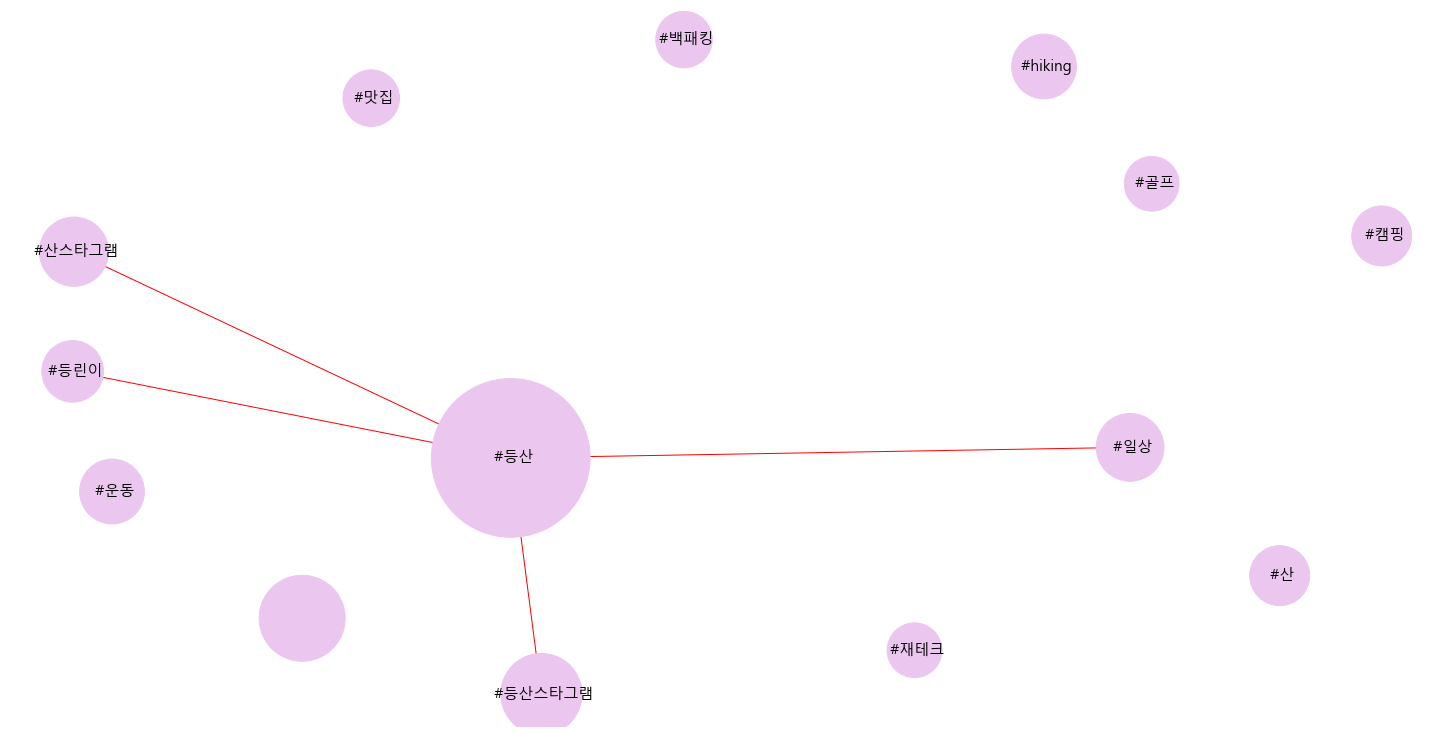

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(20,10)) 

# networkx 그래프 객체를 생성합니다.
G = nx.Graph() 

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 
# ‘노드’ 역할을 하는 원을 생성합니다.

for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])    

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘
# 관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    

# 그래프 디자인과 관련된 파라미터를 설정합니다.
# https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html

pos = nx.spring_layout(G, k=0.5, iterations=40)
sizes = [G.nodes[node]['nodesize']*200 for node in G]
nx.draw(G, pos=pos, node_size=sizes,with_labels=False, 
        edge_color='#FF0000',node_color = '#ebc7f0')
 

# 한글폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
fname = fm.FontProperties(fname=font_path).get_name()
nx.draw_networkx_labels(G, pos=pos, font_size=15,font_family=fname) 

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()